In [18]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data 2.csv')
# setting to show all columns
pd.set_option('display.max_columns', 500)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data.shape

(569, 33)

In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# vamos a ver cuántos pacientes tienen un tumor maligno y cuántos no
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [26]:
data = data.drop(columns=['id','Unnamed: 32'])

In [38]:

fig ax,plt.figure(figsize=(15, 15))
ax.hlines([len(data)/3, len(data)*(2/3), len(data)], *ax.get_xlim())
sns.heatmap(data.corr(), fmt='.2f', annot=True)


SyntaxError: invalid syntax (<ipython-input-38-d0e611b08fee>, line 2)

In [29]:
# vemos que radius, perimeter y area están muy correladas entre ellas, para mean, se y worst, por lo que
# vamos a quitarnos dos de ellas
data = data.drop(columns=['perimeter_mean',
                 'area_mean',
                 'perimeter_se',
                 'area_se',
                 'perimeter_worst',
                 'area_worst'])

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), fmt='.2f', annot=True)

In [ ]:
# la variable concave_points se podría eliminar en mean y worst porque tienen alta correlación con otras
# variables, pero vamos a eliminarla para se también

In [32]:
data = data.drop(columns=['concave points_mean',
                 'concave points_se',
                 'concave points_worst'])

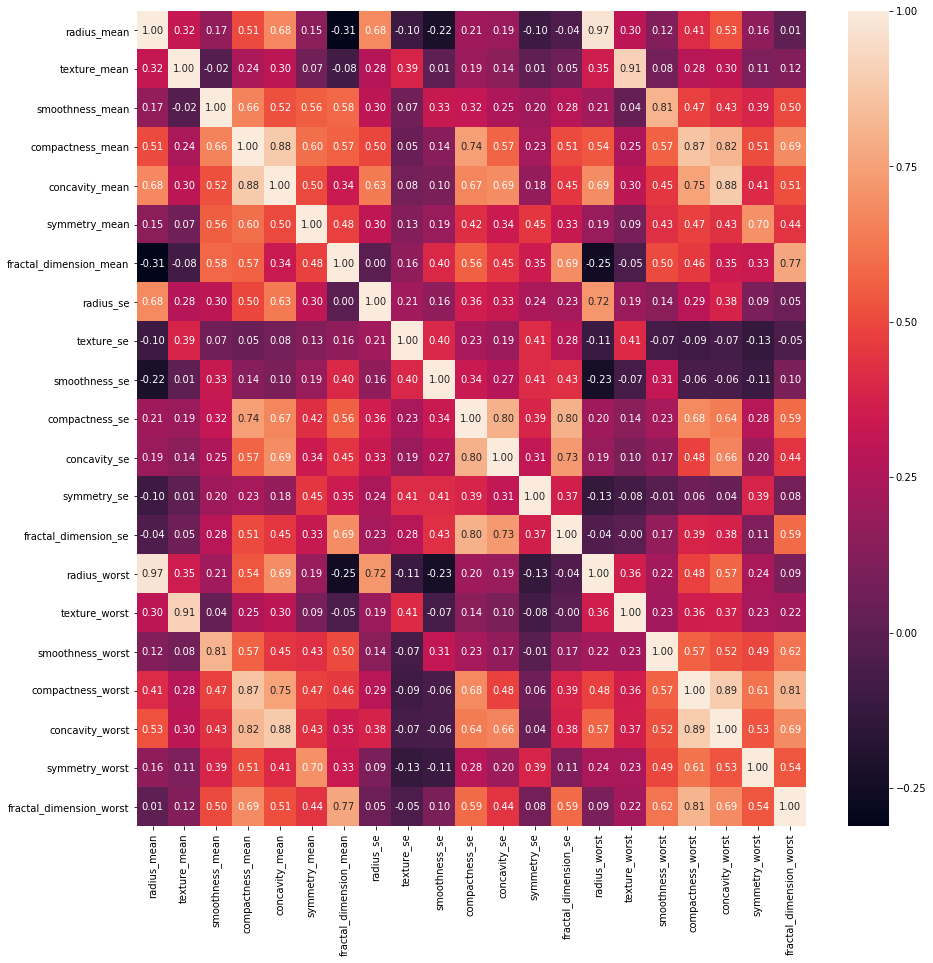

In [33]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), fmt='.2f', annot=True)

In [34]:
data = data.drop(columns=['concavity_mean',
                 'concavity_se',
                 'concavity_worst'])

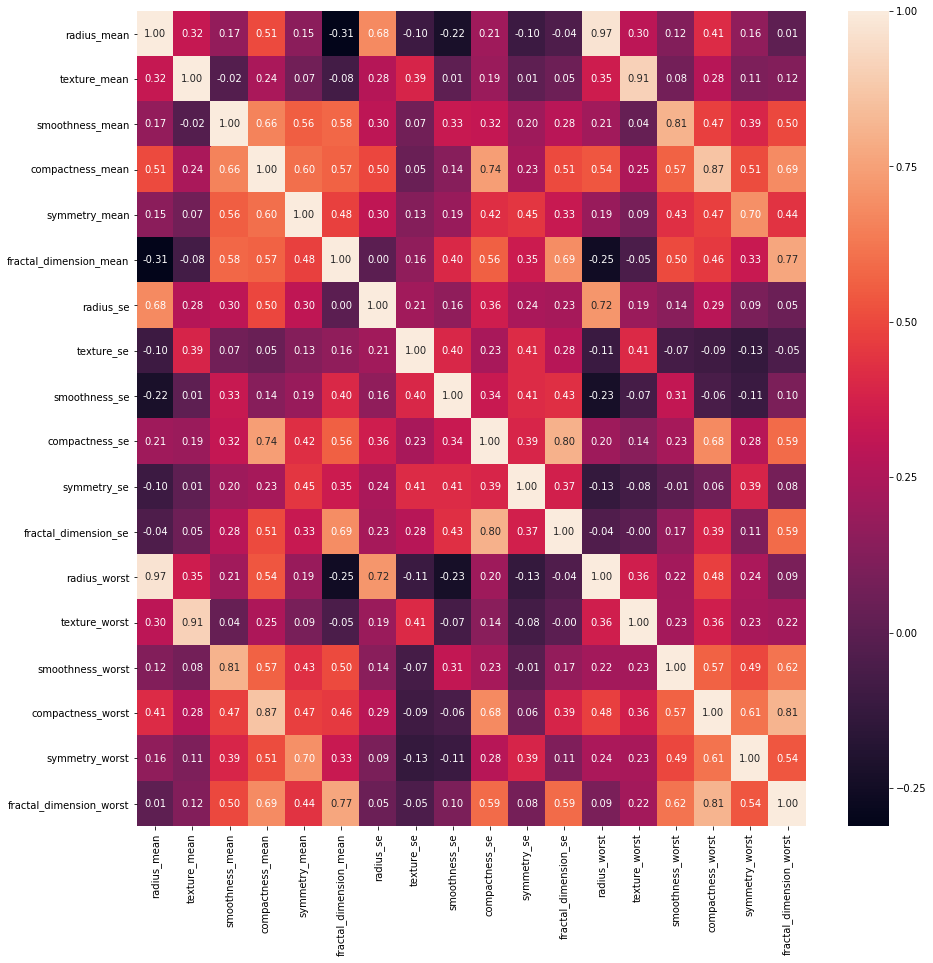

In [35]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), fmt='.2f', annot=True)